In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [70]:
train_df = pd.read_csv('training_data.csv')
test_df = pd.read_csv('testing_data.csv')


test_df[test_df['z'] == 0] = test_df['z'].mean()
test_df[test_df['x'] == 0] = test_df['x'].mean()
test_df[test_df['y'] == 0] = test_df['y'].mean()

In this notebook, we will build a simple NN model to predict some data

In [71]:
# Now we need to turn the data into a feature tensor and a target tensor
feature_col = train_df.keys().drop('price')
train_x = tf.convert_to_tensor(
    train_df[feature_col])
train_y = tf.convert_to_tensor(
    train_df['price']
)

In [72]:
# Specify some simple parameters
EPOCH_NUM = 10
BATCH_SIZE = 256

In [73]:
# Now we can build a model
model = tf.keras.Sequential(
    [
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(16, activation='relu'),
        tf.keras.layers.Dense(8, activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)

In [74]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(train_x, train_y, epochs=2*EPOCH_NUM, batch_size=BATCH_SIZE)

Epoch 1/20


2023-02-26 00:17:55.864823: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


856/856 [==============================] - 8s 8ms/step - loss: 11013011.0000 - root_mean_squared_error: 3318.5859
Epoch 2/20
856/856 [==============================] - 7s 8ms/step - loss: 1304742.5000 - root_mean_squared_error: 1142.2533
Epoch 3/20
856/856 [==============================] - 7s 9ms/step - loss: 1212673.0000 - root_mean_squared_error: 1101.2144
Epoch 4/20
856/856 [==============================] - 7s 8ms/step - loss: 1123576.1250 - root_mean_squared_error: 1059.9888
Epoch 5/20
856/856 [==============================] - 7s 8ms/step - loss: 1026008.8125 - root_mean_squared_error: 1012.9210
Epoch 6/20
856/856 [==============================] - 7s 8ms/step - loss: 923328.1250 - root_mean_squared_error: 960.8997
Epoch 7/20
856/856 [==============================] - 7s 8ms/step - loss: 839417.1250 - root_mean_squared_error: 916.1971
Epoch 8/20
856/856 [==============================] - 7s 9ms/step - loss: 801256.5625 - root_mean_squared_error: 895.1294
Epoch 9/20
856/856 [====

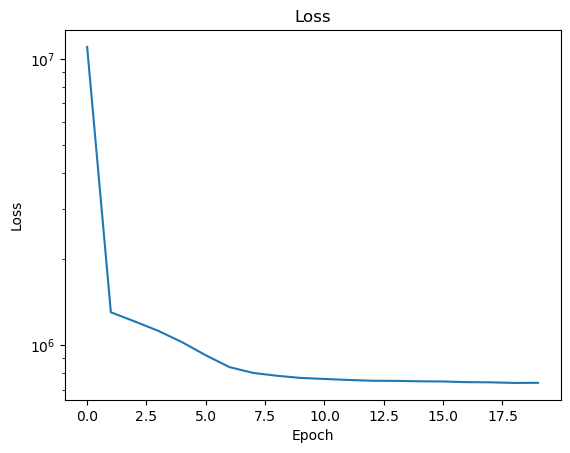

In [79]:
loss = history.history['loss']

plt.plot(loss)
plt.yscale('log')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

Now we want to run this on the actual test data

In [80]:
# test_df = tf.convert_to_tensor(test_df[feature_col])

In [78]:
# Make prediction
y_pred = model.predict(test_df)

  58/4033 [..............................] - ETA: 10s

2023-02-26 00:20:35.281033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


4033/4033 [==============================] - 10s 2ms/step


In [81]:
# Load submission df to replace
submission_df = pd.read_csv('sample_submission.csv', index_col='id')
submission_df['price'] = y_pred

# create submission
submission_df.to_csv('submission_nn.csv')

In [37]:
test = pd.read_csv('test.csv')
test

,id,carat,cut,color,clarity,depth,table,x,y,z
0,193573,0.35,Ideal,D,VS2,62.3,56.0,4.51,4.54,2.82
1,193574,0.77,Very Good,F,SI2,62.8,56.0,5.83,5.87,3.68
2,193575,0.71,Ideal,I,VS2,61.9,53.0,5.77,5.74,3.55
3,193576,0.33,Ideal,G,VVS2,61.6,55.0,4.44,4.42,2.73
4,193577,1.20,Very Good,I,VS2,62.7,56.0,6.75,6.79,4.24
...,...,...,...,...,...,...,...,...,...,...
129045,322618,0.72,Ideal,D,VVS2,62.0,56.0,5.75,5.78,3.57
129046,322619,0.70,Premium,D,SI1,59.6,62.0,5.77,5.74,3.43
129047,322620,1.01,Premium,G,VVS2,62.3,58.0,6.44,6.41,4.01
129048,322621,1.35,Ideal,D,I1,62.0,56.0,7.05,7.08,4.38


In [76]:
train_df.min()

carat                     0.200000
cut                       0.000000
color                     0.000000
clarity                   2.000000
depth                    50.800000
table                    49.000000
x                         3.730000
y                         3.710000
z                         2.060000
price                   326.000000
volume                   31.920967
density                   0.004078
table_percentage        554.371002
depth_percentage        602.766798
surface_area             62.174200
depth_to_table_ratio      0.752857
dtype: float64

In [77]:
test_df.min()

carat                   0.200000
cut                     0.000000
color                   0.000000
clarity                 2.000000
depth                   3.531802
table                   3.531802
x                       3.531802
y                       3.531802
z                       2.250000
volume                  3.531802
density                 0.000602
table_percentage        3.531802
depth_percentage        3.531802
surface_area            3.531802
depth_to_table_ratio    0.791429
dtype: float64